In [212]:
#Import dependencies
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [213]:
#dataset
file_path = "crypto_data.csv"
crypto_df = pd.read_csv(file_path)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [214]:
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [215]:
#drop null
crypto_df.dropna(inplace=True)
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [216]:
#removing rows with no coins being mined
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]> 0]
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [217]:
crypto_df = crypto_df.drop(columns='CoinName', axis=1)
crypto_df

,Unnamed: 0,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,1337,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,True,PoW,7.296538e+06,21000000


In [218]:
crypto_df.set_index('Unnamed: 0', inplace=True)

In [219]:
df6 = df5.drop(['IsTrading'], axis=1)
df6

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [220]:
#get info
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   IsTrading        532 non-null    bool   
 2   ProofType        532 non-null    object 
 3   TotalCoinsMined  532 non-null    float64
 4   TotalCoinSupply  532 non-null    object 
dtypes: bool(1), float64(1), object(3)
memory usage: 21.3+ KB


In [221]:
# Convert to numerical Algorithm and ProofType
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X

,IsTrading,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42,True,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,True,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,True,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,True,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,True,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,True,2.000000e+09,2000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,True,1.493105e+07,250000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,True,9.802226e+08,1400222610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Using PCA


In [222]:
# Standardize the data
crypto_scaled = StandardScaler().fit_transform(X[['TotalCoinsMined','TotalCoinSupply']])
crypto_scaled

array([[-0.11710817, -0.1528703 ],
       [-0.09396955, -0.145009  ],
       [ 0.52494561,  4.48942416],
       ...,
       [-0.09561336, -0.13217937],
       [-0.11694817, -0.15255998],
       [-0.11710536, -0.15285552]])

In [223]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=0.99)

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(crypto_scaled)

In [224]:
# Transform PCA data to a DataFrame
crypto_pca_df = pd.DataFrame(
    data=crypto_pca )
crypto_pca_df

,0,1
0,-0.190904,-0.025288
1,-0.168983,-0.036090
2,3.545695,2.803310
3,-0.190406,-0.025346
4,-0.189234,-0.026957
...,...,...
527,-0.138994,-0.035402
528,-0.188060,-0.022907
529,-0.161074,-0.025856
530,-0.190571,-0.025181


In [225]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.8511505, 0.1488495])

# Running KMeans with PCA

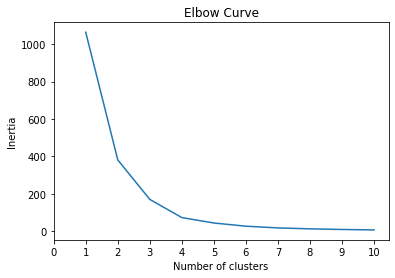

In [226]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [227]:
# Get predictions
model = KMeans(n_clusters=3, random_state=5)

#fit the model
model.fit(crypto_pca_df)
#predict clusters
predictions = model.predict(crypto_pca_df)
len(predictions)

532

# t-SNE

In [228]:
tsne = TSNE(learning_rate=35)

In [229]:
#Fit 
tsne_features = tsne.fit_transform(crypto_pca_df)

In [230]:
tsne_features.shape

(532, 2)

In [231]:
# Prepare to plot the dataset

# The first column of transformed features
crypto_pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
crypto_pca_df['y'] = tsne_features[:,1]

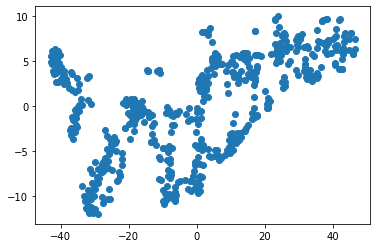

In [232]:
# Scatter plot
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'])
plt.show()

In [233]:
crypto_pca_df['x']

0     -42.971382
1      24.153322
2      45.814114
3     -18.466505
4       1.807421
         ...    
527    29.891560
528    11.466117
529    26.594040
530   -28.042208
531   -42.442165
Name: x, Length: 532, dtype: float32

In [234]:
crypto_pca_df['y']

0      5.515752
1      8.756813
2      5.752409
3     -1.086880
4      8.225731
         ...   
527    7.811943
528   -4.158429
529    6.629999
530   -6.736032
531    4.611201
Name: y, Length: 532, dtype: float32

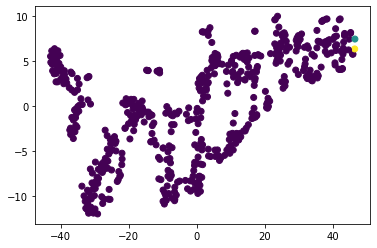

In [235]:
#Color Scatter plot
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'], c=predictions)
plt.show()